In [57]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import mapplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mapplotlib'

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [32]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
june_temps

[('2010-06-01', 78.0, 0.0),
 ('2010-06-02', 76.0, 0.01),
 ('2010-06-03', 78.0, 0.0),
 ('2010-06-04', 76.0, 0.0),
 ('2010-06-05', 77.0, 0.0),
 ('2010-06-06', 78.0, 0.0),
 ('2010-06-07', 77.0, 0.0),
 ('2010-06-08', 78.0, 0.0),
 ('2010-06-09', 78.0, 0.0),
 ('2010-06-10', 79.0, 0.0),
 ('2010-06-11', 78.0, 0.0),
 ('2010-06-12', 78.0, 0.0),
 ('2010-06-13', 78.0, 0.0),
 ('2010-06-14', 77.0, 0.0),
 ('2010-06-15', 78.0, 0.0),
 ('2010-06-16', 78.0, 0.0),
 ('2010-06-17', 77.0, 0.0),
 ('2010-06-18', 77.0, 0.0),
 ('2010-06-19', 82.0, 0.0),
 ('2010-06-20', 78.0, 0.0),
 ('2010-06-21', 78.0, 0.0),
 ('2010-06-22', 78.0, 0.0),
 ('2010-06-23', 78.0, 0.0),
 ('2010-06-24', 78.0, 0.0),
 ('2010-06-25', 77.0, 0.0),
 ('2010-06-26', 76.0, 0.02),
 ('2010-06-27', 78.0, 0.0),
 ('2010-06-28', 78.0, 0.0),
 ('2010-06-29', 78.0, 0.0),
 ('2010-06-30', 78.0, 0.0),
 ('2011-06-01', 77.0, 0.07),
 ('2011-06-02', 78.0, 0.0),
 ('2011-06-03', 73.0, 0.56),
 ('2011-06-04', 70.0, 0.89),
 ('2011-06-05', 76.0, 0.0),
 ('2011-06-06',

In [5]:
# 2. Convert the June temperatures to a list.
june_temps=list(june_temps)

In [26]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df= pd.DataFrame(june_temps, columns=['date', 'temperature'])

In [27]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [28]:
# 5. Return to your challenge instructions to compare your summary statistics
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [17]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [18]:
# 7. Convert the December temperatures to a list.
dec_temps=list(dec_temps)

In [33]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=['date','temperature'])
dec_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [20]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:title={'center':'December Temps'}>

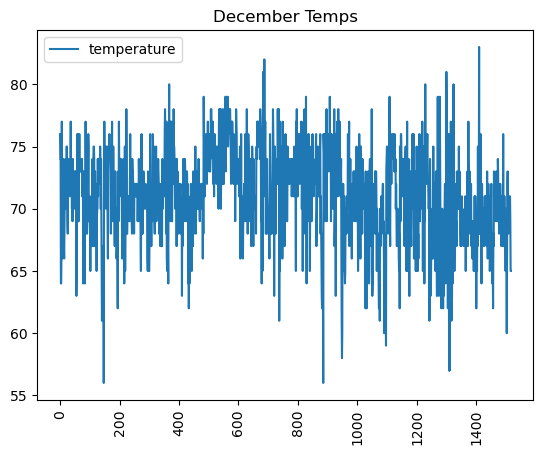

In [49]:
# 10. Return to your challenge instructions to compare your summary statistics
dec_df.plot(rot=90, title='December Temps')

<AxesSubplot:title={'center':'June Temps'}>

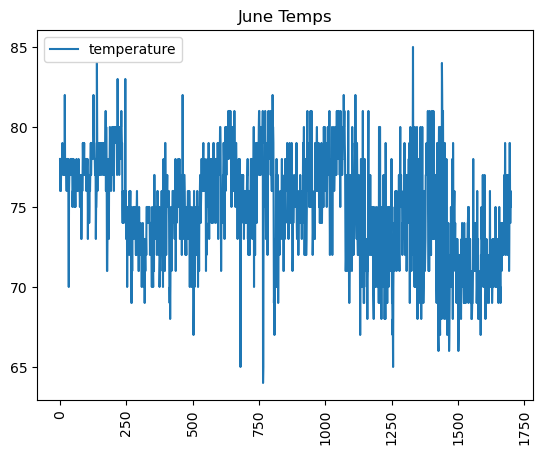

In [58]:
june_df.plot(rot=90, title='June Temps')

In [37]:
#Precipitation
june_rain = []
june_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
june_rain_df = pd.DataFrame(june_rain, columns=['date', 'Precipitation'])
june_rain_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [38]:
dec_rain = []
dec_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_rain_df = pd.DataFrame(june_rain, columns=['date', 'Precipitation'])
dec_rain_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:title={'center':'December Precipitation'}>

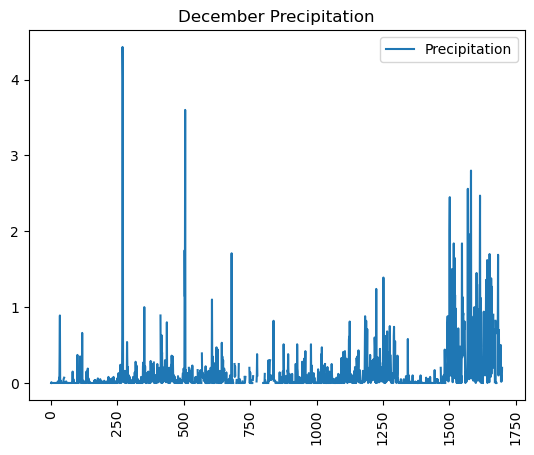

In [59]:
dec_rain_df.plot(rot=90, title='December Precipitation')

<AxesSubplot:title={'center':'June Precipitation'}>

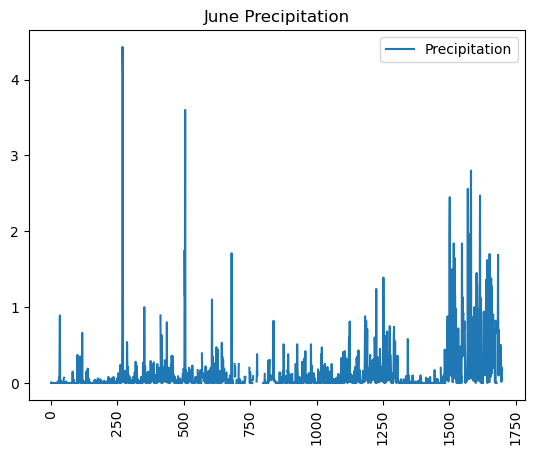

In [60]:
june_rain_df.plot(rot=90, title='June Precipitation')